## Agricultural CO2 Emissions

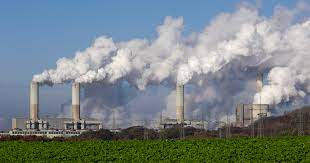

## Introduction

##### Objective: Unearthing insights from agricultural CO2 emissions dataset to combat climate change.
#####  Dataset Source: A fusion of meticulously curated data from Food and Agriculture Organization (FAO) and IPCC.
##### Scope: Delving into the depths of the data to sow the seeds of sustainable practices and informed decisions.

- The agricultural CO2 emission dataset has been meticulously compiled by merging and reprocessing numerous individual datasets sourced from the Food and Agriculture Organization (FAO) and the Intergovernmental Panel on Climate Change (IPCC). Through a series of thorough data cleaning, preprocessing, and integration steps, these disparate datasets have been unified into a comprehensive and cohesive dataset, designed to facilitate in-depth analysis and accurate forecasting.

- The dataset presented in the notebook specifically focuses on CO2 emissions attributed to the agri-food sector, which accounts for approximately 62% of the total global annual emissions. Undoubtedly, emissions from the agri-food industry play a substantial role in the context of climate change. The dataset highlights the significant contribution of these emissions to the overall global annual emissions.

- Recognizing the environmental impact of the agri-food sector, it becomes imperative to address and comprehend its role in climate change. Developing sustainable practices within this industry is crucial to mitigating the adverse effects of climate change. To achieve a comprehensive understanding of the dataset, a thorough analysis has been performed in the notebook. This analysis explores the intricate relationship between emissions, climate change, and geographic regions.

- Furthermore, the notebook provides a practical examples of ML, employing it to predict percentage variations in temperatures. By showcasing this predictive modeling, the notebook aims to demonstrate how data analysis techniques can be effectively employed to gain insights into climate-related phenomena and facilitate informed decision-making in environmental research.

- Overall, this dataset and the accompanying notebook offer valuable insights into the complex interplay of agricultural CO2 emissions, climate change, and geographic factors. It underscores the significance of sustainable practices in the agri-food sector and encourages further research and action to combat climate change effectively.


## Data Overview

#### Dataset Features:

- Savanna fires: Emissions from fires in savanna ecosystems.
- Forest fires: Emissions from fires in forested areas.
Crop Residues: Emissions from burning or decomposing leftover plant material after crop harvesting.
- Rice Cultivation: Emissions from methane released during rice cultivation.
- Drained organic soils (CO2): Emissions from carbon dioxide released when draining organic soils.
- Pesticides Manufacturing: Emissions from the production of pesticides.
- Food- Transport: Emissions from transporting food products.
- Forestland: Land covered by forests.
- Net Forest conversion: Change in forest area due to deforestation and afforestation.
- Food Household Consumption: Emissions from food consumption at the household level.
- Food Retail: Emissions from the operation of retail establishments selling food.
- On-farm Electricity Use: Electricity consumption on farms.
- Food Packaging: Emissions from the production and disposal of food packaging materials.
- Agrifood Systems Waste Disposal: Emissions from waste disposal in the agrifood system.
- Food Processing: Emissions from processing food products.
- Fertilizers Manufacturing: Emissions from the production of fertilizers.
- IPPU: Emissions from industrial processes and product use.
- Manure applied to Soils: Emissions from applying animal manure to agricultural soils.
- Manure left on Pasture: Emissions from animal manure on pasture or grazing land.
- Manure Management: Emissions from managing and treating animal manure.
- Fires in organic soils: Emissions from fires in organic soils.
- Fires in humid tropical forests: Emissions from fires in humid tropical forests.
- On-farm energy use: Energy consumption on farms.
- Rural population: Number of people living in rural areas.
- Urban population: Number of people living in urban areas.
- Total Population - Male: Total number of male individuals in the population.
- Total Population - Female: Total number of female individuals in the population.
- total_emission: Total greenhouse gas emissions from various sources.
- Average Temperature °C: The average increasing of temperature (by year) in degrees Celsius,

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pycountry
import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
sns.set_palette("muted")
sns.set_palette("viridis")
%matplotlib inline  

In [2]:
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

### Number of Samples: 

In [3]:
co2_emission = pd.read_csv('Agrofood_co2_emission[1].csv')

co2_emission.head()

,Area,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,...,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C
0,Afghanistan,1990,14.7237,0.0557,205.6077,686.00,0.0,11.807483,63.1152,-2388.803,...,319.1763,0.0,0.0,NaN,9655167.0,2593947.0,5348387.0,5346409.0,2198.963539,0.536167
1,Afghanistan,1991,14.7237,0.0557,209.4971,678.16,0.0,11.712073,61.2125,-2388.803,...,342.3079,0.0,0.0,NaN,10230490.0,2763167.0,5372959.0,5372208.0,2323.876629,0.020667
2,Afghanistan,1992,14.7237,0.0557,196.5341,686.00,0.0,11.712073,53.3170,-2388.803,...,349.1224,0.0,0.0,NaN,10995568.0,2985663.0,6028494.0,6028939.0,2356.304229,-0.259583
3,Afghanistan,1993,14.7237,0.0557,230.8175,686.00,0.0,11.712073,54.3617,-2388.803,...,352.2947,0.0,0.0,NaN,11858090.0,3237009.0,7003641.0,7000119.0,2368.470529,0.101917
4,Afghanistan,1994,14.7237,0.0557,242.0494,705.60,0.0,11.712073,53.9874,-2388.803,...,367.6784,0.0,0.0,NaN,12690115.0,3482604.0,7733458.0,7722096.0,2500.768729,0.372250


In [4]:
co2_emission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6965 entries, 0 to 6964
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Area                             6965 non-null   object 
 1   Year                             6965 non-null   int64  
 2   Savanna fires                    6934 non-null   float64
 3   Forest fires                     6872 non-null   float64
 4   Crop Residues                    5576 non-null   float64
 5   Rice Cultivation                 6965 non-null   float64
 6   Drained organic soils (CO2)      6965 non-null   float64
 7   Pesticides Manufacturing         6965 non-null   float64
 8   Food Transport                   6965 non-null   float64
 9   Forestland                       6472 non-null   float64
 10  Net Forest conversion            6472 non-null   float64
 11  Food Household Consumption       6492 non-null   float64
 12  Food Retail         

### Number of Features:

In [5]:
co2_emission.shape

(6965, 31)

In [6]:
co2_emission.columns

Index(['Area', 'Year', 'Savanna fires', 'Forest fires', 'Crop Residues',
       'Rice Cultivation', 'Drained organic soils (CO2)',
       'Pesticides Manufacturing', 'Food Transport', 'Forestland',
       'Net Forest conversion', 'Food Household Consumption', 'Food Retail',
       'On-farm Electricity Use', 'Food Packaging',
       'Agrifood Systems Waste Disposal', 'Food Processing',
       'Fertilizers Manufacturing', 'IPPU', 'Manure applied to Soils',
       'Manure left on Pasture', 'Manure Management', 'Fires in organic soils',
       'Fires in humid tropical forests', 'On-farm energy use',
       'Rural population', 'Urban population', 'Total Population - Male',
       'Total Population - Female', 'total_emission',
       'Average Temperature °C'],
      dtype='object')

In [7]:
co2_emission.dtypes

Area                                object
Year                                 int64
Savanna fires                      float64
Forest fires                       float64
Crop Residues                      float64
Rice Cultivation                   float64
Drained organic soils (CO2)        float64
Pesticides Manufacturing           float64
Food Transport                     float64
Forestland                         float64
Net Forest conversion              float64
Food Household Consumption         float64
Food Retail                        float64
On-farm Electricity Use            float64
Food Packaging                     float64
Agrifood Systems Waste Disposal    float64
Food Processing                    float64
Fertilizers Manufacturing          float64
IPPU                               float64
Manure applied to Soils            float64
Manure left on Pasture             float64
Manure Management                  float64
Fires in organic soils             float64
Fires in hu

### Data Preprocessing:

In [8]:
co2_emission.isna().sum()

Area                                  0
Year                                  0
Savanna fires                        31
Forest fires                         93
Crop Residues                      1389
Rice Cultivation                      0
Drained organic soils (CO2)           0
Pesticides Manufacturing              0
Food Transport                        0
Forestland                          493
Net Forest conversion               493
Food Household Consumption          473
Food Retail                           0
On-farm Electricity Use               0
Food Packaging                        0
Agrifood Systems Waste Disposal       0
Food Processing                       0
Fertilizers Manufacturing             0
IPPU                                743
Manure applied to Soils             928
Manure left on Pasture                0
Manure Management                   928
Fires in organic soils                0
Fires in humid tropical forests     155
On-farm energy use                  956


In [9]:
co2_emission = co2_emission.replace(0,np.NaN)

In [10]:
missing_percentage = (co2_emission.isna().sum()/len(co2_emission))*100
missing_percentage                      

Area                                0.000000
Year                                0.000000
Savanna fires                      31.701364
Forest fires                       42.196698
Crop Residues                      19.942570
Rice Cultivation                    1.550610
Drained organic soils (CO2)        55.319454
Pesticides Manufacturing            9.619526
Food Transport                      0.000000
Forestland                         30.796841
Net Forest conversion              46.733668
Food Household Consumption          6.877243
Food Retail                         0.014358
On-farm Electricity Use             0.014358
Food Packaging                      0.014358
Agrifood Systems Waste Disposal     0.000000
Food Processing                     0.000000
Fertilizers Manufacturing           0.000000
IPPU                               12.936109
Manure applied to Soils            13.323762
Manure left on Pasture              0.000000
Manure Management                  13.323762
Fires in o

In [11]:
columns_to_drop=missing_percentage[missing_percentage>60].index
co2_emission = co2_emission.drop(columns_to_drop, axis=1)
co2_emission

,Area,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,...,Manure applied to Soils,Manure left on Pasture,Manure Management,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C
0,Afghanistan,1990,14.7237,0.0557,205.6077,686.0000,NaN,11.807483,63.1152,-2388.8030,...,260.1431,1590.5319,319.1763,NaN,9655167.0,2593947.0,5348387.0,5346409.0,2198.963539,0.536167
1,Afghanistan,1991,14.7237,0.0557,209.4971,678.1600,NaN,11.712073,61.2125,-2388.8030,...,268.6292,1657.2364,342.3079,NaN,10230490.0,2763167.0,5372959.0,5372208.0,2323.876629,0.020667
2,Afghanistan,1992,14.7237,0.0557,196.5341,686.0000,NaN,11.712073,53.3170,-2388.8030,...,264.7898,1653.5068,349.1224,NaN,10995568.0,2985663.0,6028494.0,6028939.0,2356.304229,-0.259583
3,Afghanistan,1993,14.7237,0.0557,230.8175,686.0000,NaN,11.712073,54.3617,-2388.8030,...,261.7221,1642.9623,352.2947,NaN,11858090.0,3237009.0,7003641.0,7000119.0,2368.470529,0.101917
4,Afghanistan,1994,14.7237,0.0557,242.0494,705.6000,NaN,11.712073,53.9874,-2388.8030,...,267.6219,1689.3593,367.6784,NaN,12690115.0,3482604.0,7733458.0,7722096.0,2500.768729,0.372250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6960,Zimbabwe,2016,1190.0089,232.5068,70.9451,7.4088,NaN,75.000000,251.1465,76500.2982,...,96.1332,2721.1459,282.5994,417.3150,10934468.0,5215894.0,6796658.0,7656047.0,98491.026347,1.120250
6961,Zimbabwe,2017,1431.1407,131.1324,108.6262,7.9458,NaN,67.000000,255.7975,76500.2982,...,81.2314,2744.8763,255.5900,398.1644,11201138.0,5328766.0,6940631.0,7810471.0,97159.311553,0.046500
6962,Zimbabwe,2018,1557.5830,221.6222,109.9835,8.1399,NaN,66.000000,327.0897,76500.2982,...,81.0712,2790.0949,257.2735,465.7735,11465748.0,5447513.0,7086002.0,7966181.0,97668.308205,0.516333
6963,Zimbabwe,2019,1591.6049,171.0262,45.4574,7.8322,NaN,73.000000,290.1893,76500.2982,...,85.7211,2828.7215,267.5224,444.2335,11725970.0,5571525.0,7231989.0,8122618.0,98988.062799,0.985667


In [12]:
def regressor_imputer(co2_emission, max_depth=6):
    co2_emission_filled = co2_emission.copy()

    # Separate numeric columns from non-numeric columns
    numeric_columns = co2_emission_filled.select_dtypes(include=[float]).columns

    # Use IterativeImputer with RandomForestRegressor as estimator for numeric columns only
    imputer = IterativeImputer(estimator=RandomForestRegressor(max_depth=max_depth), random_state=0)

    # Perform imputation on the numeric columns
    co2_emission_filled[numeric_columns] = imputer.fit_transform(co2_emission_filled[numeric_columns])

    return co2_emission_filled

# Assuming 'co2_emission' is your DataFrame containing the missing values
co2_emission = regressor_imputer(co2_emission, max_depth=6)

# Now, 'co2_emission' should have the missing values filled for the numeric columns.


In [13]:
co2_emission.isna().sum()

Area                               0
Year                               0
Savanna fires                      0
Forest fires                       0
Crop Residues                      0
Rice Cultivation                   0
Drained organic soils (CO2)        0
Pesticides Manufacturing           0
Food Transport                     0
Forestland                         0
Net Forest conversion              0
Food Household Consumption         0
Food Retail                        0
On-farm Electricity Use            0
Food Packaging                     0
Agrifood Systems Waste Disposal    0
Food Processing                    0
Fertilizers Manufacturing          0
IPPU                               0
Manure applied to Soils            0
Manure left on Pasture             0
Manure Management                  0
On-farm energy use                 0
Rural population                   0
Urban population                   0
Total Population - Male            0
Total Population - Female          0
t

## Exploratory Data Analysis

In [14]:
summary_stats = co2_emission.describe(include='all')
summary_stats

,Area,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,...,Manure applied to Soils,Manure left on Pasture,Manure Management,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C
count,6965,6965.000000,6965.000000,6965.000000,6965.000000,6965.000000,6965.000000,6965.000000,6965.000000,6965.000000,...,6965.000000,6965.000000,6965.000000,6965.000000,6.965000e+03,6.965000e+03,6.965000e+03,6.965000e+03,6.965000e+03,6965.000000
unique,236,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2005.124910,1949.339909,1335.746996,827.919613,4268.671408,6571.199761,335.498466,1939.581760,-18111.148487,...,934.783230,3518.026573,2298.889236,2716.853042,1.788070e+07,1.693401e+07,1.761963e+07,1.732447e+07,6.409124e+04,0.872989
std,NaN,8.894665,5715.496729,3808.958904,3328.943883,17611.827044,22869.324265,1428.744999,5616.748808,79263.443201,...,3004.482407,9103.556202,7430.571719,11770.566830,8.901085e+07,6.574318e+07,7.603993e+07,7.251711e+07,2.283130e+05,0.555930
min,NaN,1990.000000,0.000100,0.000400,0.000200,0.003100,0.459600,1.000000,0.000100,-797183.079000,...,0.049000,0.000700,0.432900,0.031900,8.000000e+01,4.000000e+00,2.500000e+02,2.700000e+02,-3.918841e+05,-1.415833
25%,NaN,1997.000000,5.460400,14.884800,14.314870,228.614400,480.870201,11.481085,27.958600,-3992.726369,...,23.119500,139.669900,52.707800,17.738200,1.147400e+05,2.173860e+05,2.013260e+05,2.078900e+05,5.221244e+03,0.511333
50%,NaN,2005.000000,80.625433,153.781390,128.628800,558.225029,1336.825246,15.000000,204.962800,-2375.748750,...,189.282900,972.567400,427.217100,182.461500,1.680730e+06,2.357581e+06,2.469660e+06,2.444135e+06,1.214765e+04,0.834300
75%,NaN,2013.000000,1694.029000,810.407225,270.455600,1536.640000,3839.349724,118.000000,1207.000900,-102.300000,...,996.560460,2430.792600,2408.884700,1166.030600,8.177340e+06,8.277123e+06,9.075924e+06,9.112588e+06,3.513973e+04,1.206750


### A captivating correlation matrix, revealing the interconnectedness of variables.

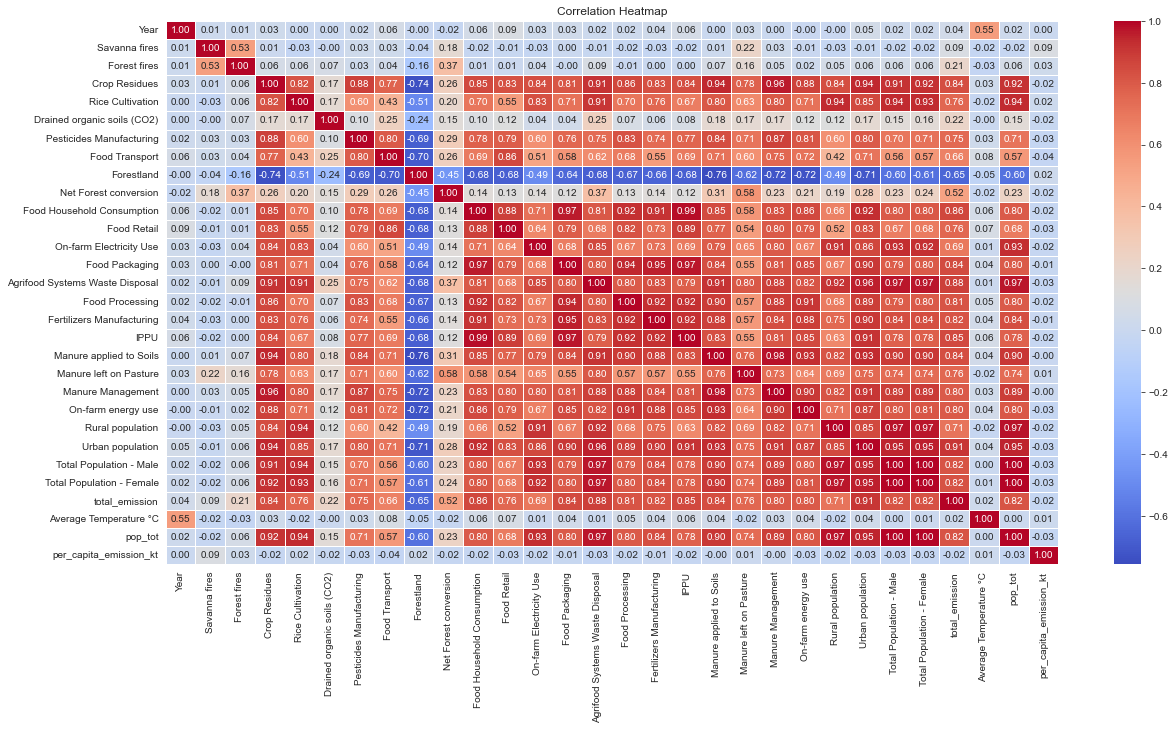

In [53]:
correlation_matrix = co2_emission.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.savefig("Correlation.png", dpi=300, bbox_inches="tight")
plt.show()

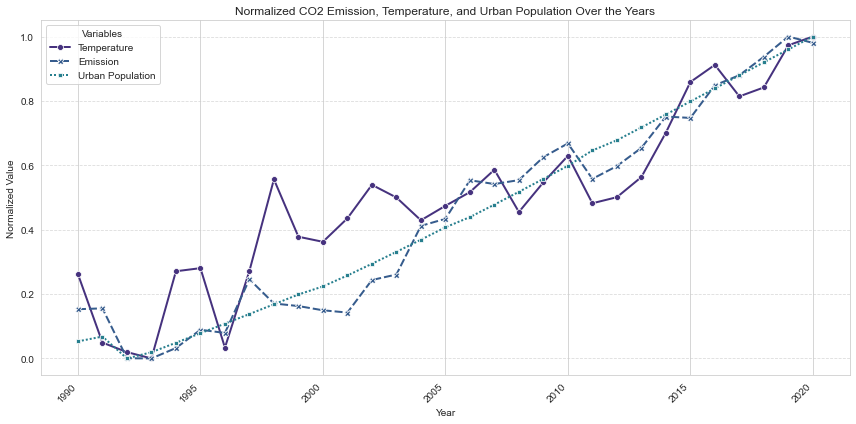

In [52]:
temp_emission = co2_emission.groupby("Year").agg({
    "Average Temperature °C": "mean",
    "total_emission": "mean",
    "Urban population": "mean"
})

# Normalize the data using Min-Max normalization
def normalizer(co2_emission):
    norm = (co2_emission - co2_emission.min()) / (co2_emission.max() - co2_emission.min())
    return norm

norm_temp = normalizer(temp_emission)
plt.figure(figsize=(12, 6))
sns.lineplot(data=norm_temp, markers=True, lw=2)
plt.xlabel('Year')
plt.ylabel('Normalized Value')
plt.title('Normalized CO2 Emission, Temperature, and Urban Population Over the Years')
plt.legend(title='Variables', loc='upper left', labels=['Temperature', 'Emission', 'Urban Population'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig("normalized_graph.png", dpi=300, bbox_inches="tight")
plt.show()


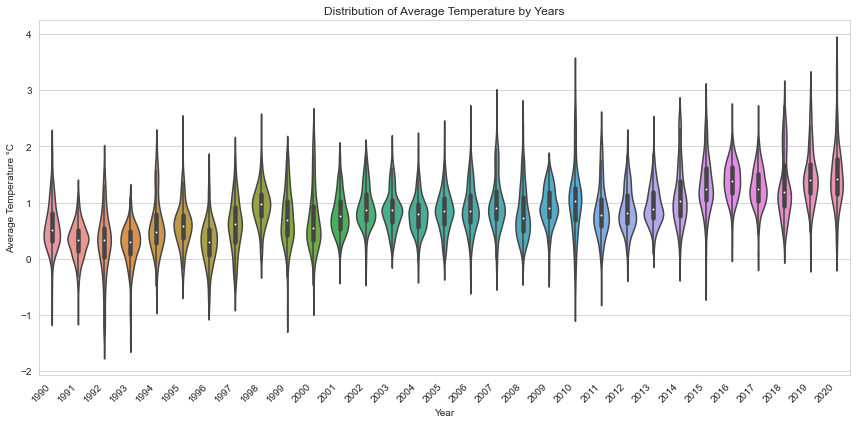

In [54]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=co2_emission, x='Year', y='Average Temperature °C')
plt.xlabel('Year')
plt.ylabel('Average Temperature °C')
plt.title('Distribution of Average Temperature by Years')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig("Distribution of Average Temperature by Years.png", dpi=300, bbox_inches="tight")
plt.show()


In [18]:
continent_mapping = {
    'Africa': ['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cameroon', 'Central African Republic', 'Chad', 'Comoros', 'Congo', 'Côte d\'Ivoire', 'Djibouti', 'Egypt', 'Equatorial Guinea', 'Eritrea', 'Eswatini', 'Ethiopia', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Kenya', 'Lesotho', 'Liberia', 'Libya', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mauritius', 'Morocco', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Rwanda', 'São Tomé and Príncipe', 'Senegal', 'Seychelles', 'Sierra Leone', 'Somalia', 'South Africa', 'South Sudan', 'Sudan', 'Tanzania', 'Togo', 'Tunisia', 'Uganda', 'Zambia', 'Zimbabwe'],
    'Asia': ['Afghanistan', 'Armenia', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Bhutan', 'Brunei', 'Cambodia', 'China', 'Cyprus', 'Georgia', 'India', 'Indonesia', 'Iran', 'Iraq', 'Israel', 'Japan', 'Jordan', 'Kazakhstan', 'Kuwait', 'Kyrgyzstan', 'Laos', 'Lebanon', 'Malaysia', 'Maldives', 'Mongolia', 'Myanmar', 'Nepal', 'North Korea', 'Oman', 'Pakistan', 'Palestine', 'Philippines', 'Qatar', 'Russia', 'Saudi Arabia', 'Singapore', 'South Korea', 'Sri Lanka', 'Syria', 'Taiwan', 'Tajikistan', 'Thailand', 'Timor-Leste', 'Turkey', 'Turkmenistan', 'United Arab Emirates', 'Uzbekistan', 'Vietnam', 'Yemen'],
    'Europe': ['Albania', 'Andorra', 'Austria', 'Belarus', 'Belgium', 'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Latvia', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malta', 'Moldova', 'Monaco', 'Montenegro', 'Netherlands', 'North Macedonia', 'Norway', 'Poland', 'Portugal', 'Romania', 'San Marino', 'Serbia', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Ukraine', 'United Kingdom', 'Vatican City'],
    'North America': ['Antigua and Barbuda', 'Bahamas', 'Barbados', 'Belize', 'Canada', 'Costa Rica', 'Cuba', 'Dominica', 'Dominican Republic', 'El Salvador', 'Grenada', 'Guatemala', 'Haiti', 'Honduras', 'Jamaica', 'Mexico', 'Nicaragua', 'Panama', 'Saint Kitts and Nevis', 'Saint Lucia', 'Saint Vincent and the Grenadines', 'Trinidad and Tobago', 'United States'],
    'Oceania': ['Australia', 'Fiji', 'Kiribati', 'Marshall Islands', 'Micronesia', 'Nauru', 'New Zealand', 'Palau', 'Papua New Guinea', 'Samoa', 'Solomon Islands', 'Tonga', 'Tuvalu', 'Vanuatu'],
    'South America': ['Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Ecuador', 'Guyana', 'Paraguay', 'Peru', 'Suriname', 'Uruguay', 'Venezuela']
}

#This function assign a continent label to each country in the co2_emission 
def assign_continent(country):
    for continent, countries in continent_mapping.items():
        if country in countries:
            return continent
    return None

co2_emission ["continent"] = co2_emission ["Area"].apply(assign_continent)

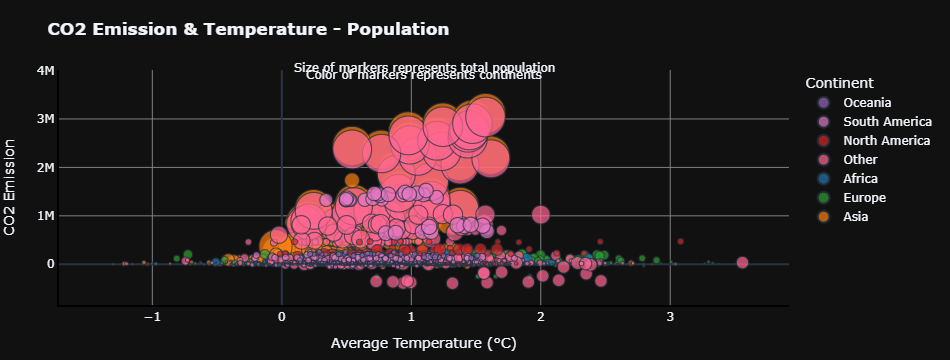

In [46]:
co2_emission ["pop_tot"] = co2_emission ["Total Population - Male"] + co2_emission ["Total Population - Female"]
def assign_continent(country):
    for continent, countries in continent_mapping.items():
        if country in countries:
            return continent
    return 'Other'  

co2_emission ["continent"] = co2_emission ["Area"].apply(assign_continent)

co2_emission  = co2_emission .dropna(subset=['Average Temperature °C', 'total_emission', 'pop_tot'])


fig = px.scatter(co2_emission , x="Average Temperature °C", y="total_emission",
                 size="pop_tot", color="continent", hover_name="Area",
                 title="<b>CO2 Emission & Temperature - Population</b>",
                 template="plotly_dark", labels={'Average Temperature °C': 'Average Temperature (°C)', 'total_emission': 'CO2 Emission', 'pop_tot': 'Total Population'},
                 color_discrete_map={'Africa': '#1f77b4', 'Asia': '#ff7f0e', 'Europe': '#2ca02c', 'North America': '#d62728', 'Oceania': '#9467bd', 'South America': '#e377c2'},
                 size_max=40, opacity=0.7)


fig.update_layout(
    legend=dict(title='Continent', traceorder='reversed', font=dict(size=12)),
    xaxis=dict(title=dict(text='Average Temperature (°C)'), showgrid=True, gridwidth=1, gridcolor='gray', showline=True, linewidth=2, linecolor='black'),
    yaxis=dict(title=dict(text='CO2 Emission'), showgrid=True, gridwidth=1, gridcolor='gray', showline=True, linewidth=2, linecolor='black'),
    hoverlabel=dict(font_size=14),
    hovermode='closest',
    showlegend=True,
    margin=dict(l=50, r=50, t=70, b=50) 
)


fig.add_annotation(
    xref="paper", yref="paper", x=0.5, y=1.05,
    text="Size of markers represents total population",
    showarrow=False, font=dict(size=12)
)
fig.add_annotation(
    xref="paper", yref="paper", x=0.5, y=1.02,
    text="Color of markers represents continents",
    showarrow=False, font=dict(size=12)
)

# Show the plot
fig.show()

In [20]:
co2_emission ["pop_tot"] = co2_emission ["Total Population - Male"] + co2_emission ["Total Population - Female"]
correlation = co2_emission.groupby(["Year"]).agg({"total_emission":"sum", "Average Temperature °C":"mean", "pop_tot":"sum"})
correlation.corr()

,total_emission,Average Temperature °C,pop_tot
total_emission,1.000000,0.90552,0.981828
Average Temperature °C,0.905520,1.00000,0.912050
pop_tot,0.981828,0.91205,1.000000


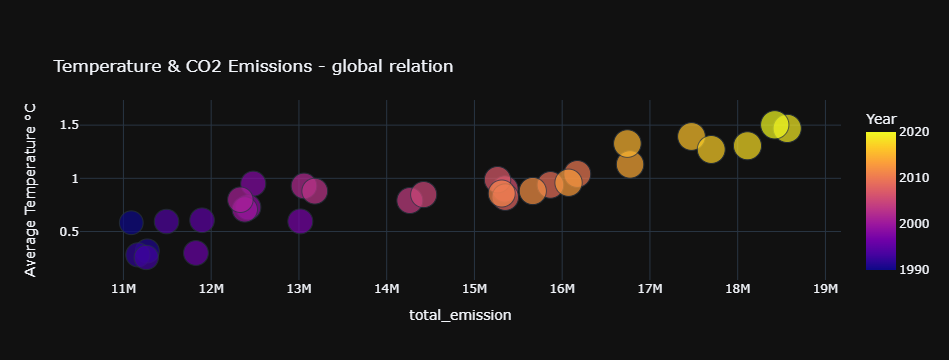

In [21]:
px.scatter(correlation.reset_index(),    
    x = "total_emission", 
    y = "Average Temperature °C", 
    size = "pop_tot",
    color = "Year", 
    title = "<br> Temperature & CO2 Emissions - global relation",
    template="plotly_dark")

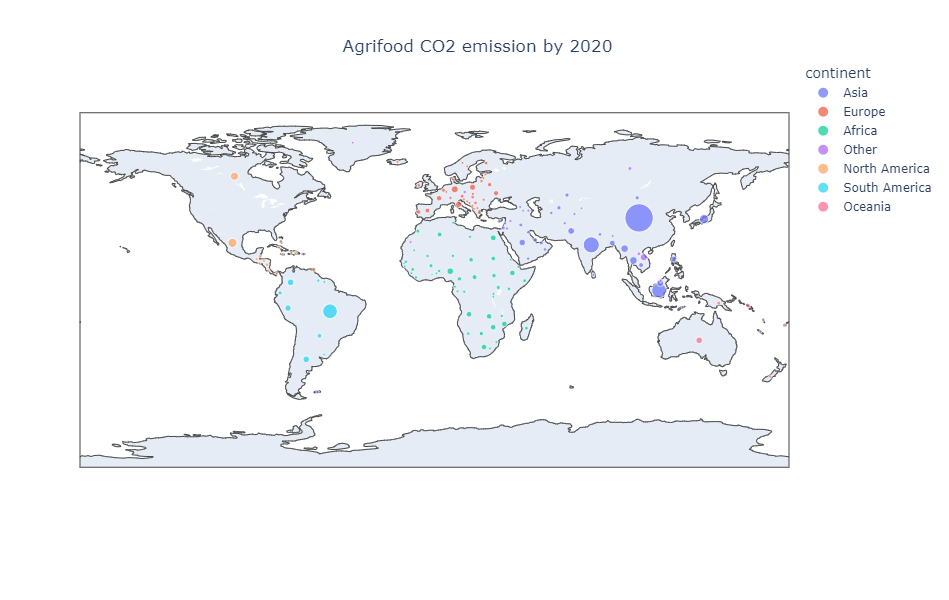

<Figure size 432x288 with 0 Axes>

In [61]:
import pycountry
# we need a iso for plotting the emission around the globe
def get_iso_alpha(country_name):
    try:
        country = pycountry.countries.get(name=country_name)
        iso_alpha = country.alpha_3
        return iso_alpha
    except:
        return None

def plot_global(co2_emission , year):
    year_co2_emission  = co2_emission .loc[co2_emission ["Year"] == year].copy()
    year_co2_emission ["iso_alpha"] = year_co2_emission ["Area"].apply(get_iso_alpha)
    
    # Normalize the emission in range 0-100 becouse of neg values non plottable
    year_co2_emission ["total_emission_norm"] = (year_co2_emission ["total_emission"] - year_co2_emission ["total_emission"].min()) / (year_co2_emission ["total_emission"].max() - year_co2_emission ["total_emission"].min()) * 100

    fig = px.scatter_geo(year_co2_emission , locations="iso_alpha", 
                        color="continent",
                        hover_name="Area", 
                        size="total_emission_norm"
                        )
    
    fig.update_layout(title={'text': f"<br> Agrifood CO2 emission by {year}", 'x': 0.455, 'xanchor': 'center'})     
    fig.update_layout(
    title={'text': f"<br> Agrifood CO2 emission by {year}", 'x': 0.5, 'xanchor': 'center'},
    autosize=False,  
    height=600,      
    width=1200       
)
    plt.savefig("Agrifood.png", format='png')
    fig.show()

plot_global(co2_emission , year=2020)



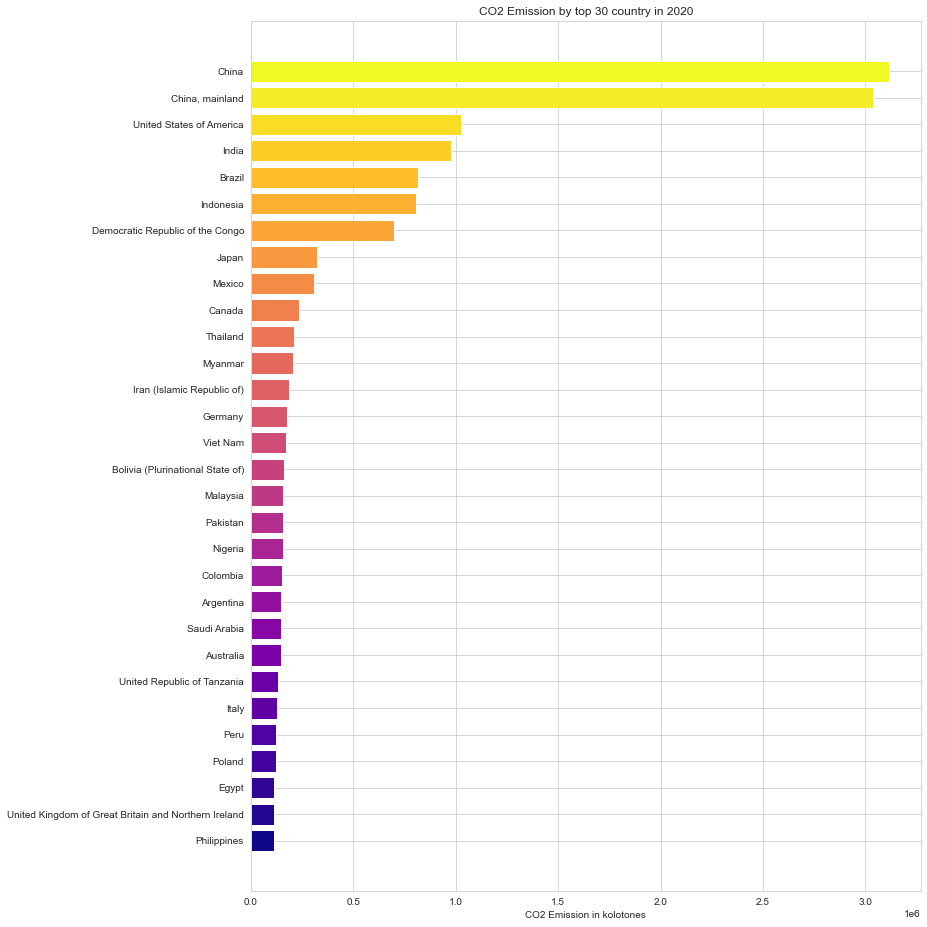

In [60]:
def country_emission(co2_emission,year, length = 30):
        co2_emission = co2_emission.copy()
        plot = co2_emission.loc[co2_emission["Year"]==year]
        plot = plot.sort_values(by = "total_emission", ascending = True).tail(length)
        colors = plt.cm.get_cmap('plasma', len(plot))
        plt.figure(figsize=(12, 16))
        plt.barh(plot['Area'], 
                plot['total_emission'], 
                color=colors(range(len(plot))))
        plt.title(f'CO2 Emission by top {length} country in {year}')
        plt.xlabel('CO2 Emission in kolotones')
        plt.savefig("co2_emission_plot.png", format='png')
        plt.show()

country_emission(co2_emission, year=2020)



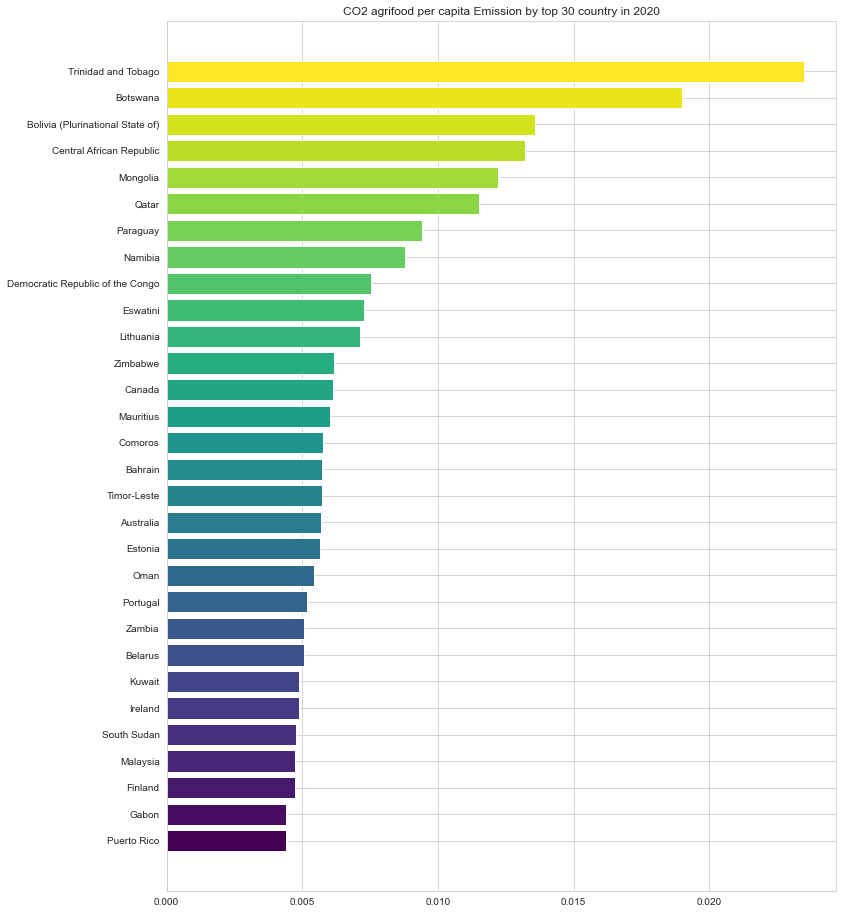

In [68]:
co2_emission["per_capita_emission_kt"] = co2_emission["total_emission"] / co2_emission["pop_tot"] 

def percapita_emission(co2_emission,year, length = 30):
        co2_emission = co2_emission.copy()
        # let's remove small island or counties ehit this filter
        plot = co2_emission.loc[(co2_emission["Year"]==year) & (co2_emission["pop_tot"] > 800000)]
        plot = plot.sort_values(by = "per_capita_emission_kt", ascending = True).tail(length)
        colors = plt.cm.get_cmap('viridis', len(plot))
        plt.figure(figsize=(12, 16))
        plt.barh(plot['Area'], 
                plot['per_capita_emission_kt'], 
                color=colors(range(len(plot))))
        plt.title(f'CO2 agrifood per capita Emission by top {length} country in {year}')
        plt.savefig("CO2 agrifood per capita Emission.png", format='png')
        plt.show()

percapita_emission(co2_emission, year=2020, length=30)

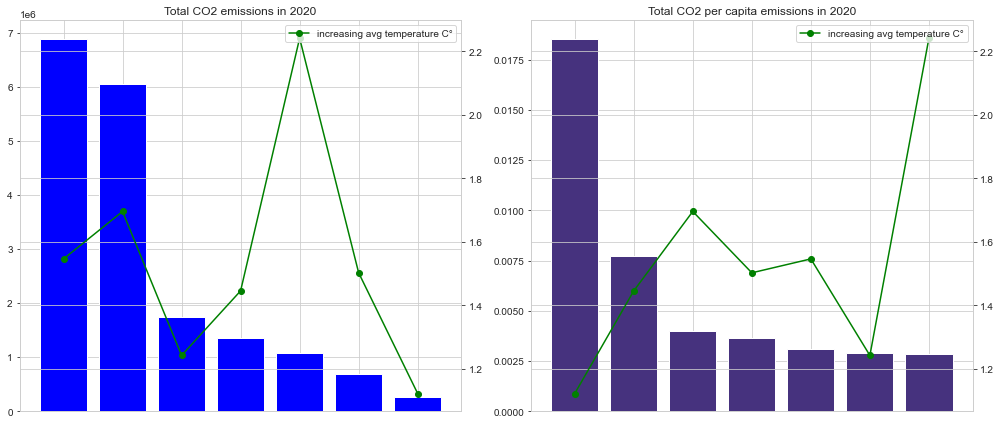

In [69]:
def continental_emission(year =2020):
    continent_co2_emission = co2_emission.loc[(co2_emission.pop_tot > 500000) & (co2_emission.Year == year)]\
        .groupby("continent")\
        .agg({"total_emission":"sum",
            "Average Temperature °C":"median",
            "per_capita_emission_kt":"mean"}).reset_index()
    continent_co2_emission = continent_co2_emission.sort_values(by="total_emission", ascending=False)
    colors = plt.cm.get_cmap('viridis', len(continent_co2_emission))

    fig, ax = plt.subplots(1, 2, figsize=(14, 6))
    ax[0].bar(continent_co2_emission["continent"], continent_co2_emission.total_emission, color="blue")
    ax[0].set_title(f"Total CO2 emissions in {year}")

    ax2 = ax[0].twinx() 
    ax2.plot(continent_co2_emission["continent"], continent_co2_emission["Average Temperature °C"], color='green', marker='o')
    ax2.legend(["increasing avg temperature C°"], loc='upper right') 


    continent_co2_emission = continent_co2_emission.sort_values(by="per_capita_emission_kt", ascending=False)
    ax[1].bar(continent_co2_emission["continent"], continent_co2_emission["per_capita_emission_kt"])
    ax[1].set_title(f"Total CO2 per capita emissions in {year}")
    ax3 = ax[1].twinx() 
    ax3.plot(continent_co2_emission["continent"], continent_co2_emission["Average Temperature °C"], color='green', marker='o')
    ax3.legend(["increasing avg temperature C°"], loc='upper right')

    for axis in ax:
        axis.set_xticklabels(axis.get_xticklabels(), rotation='vertical')

    plt.tight_layout()
    plt.savefig("Total CO2 Emission.png", format='png')
    plt.show()

continental_emission(year =2020)

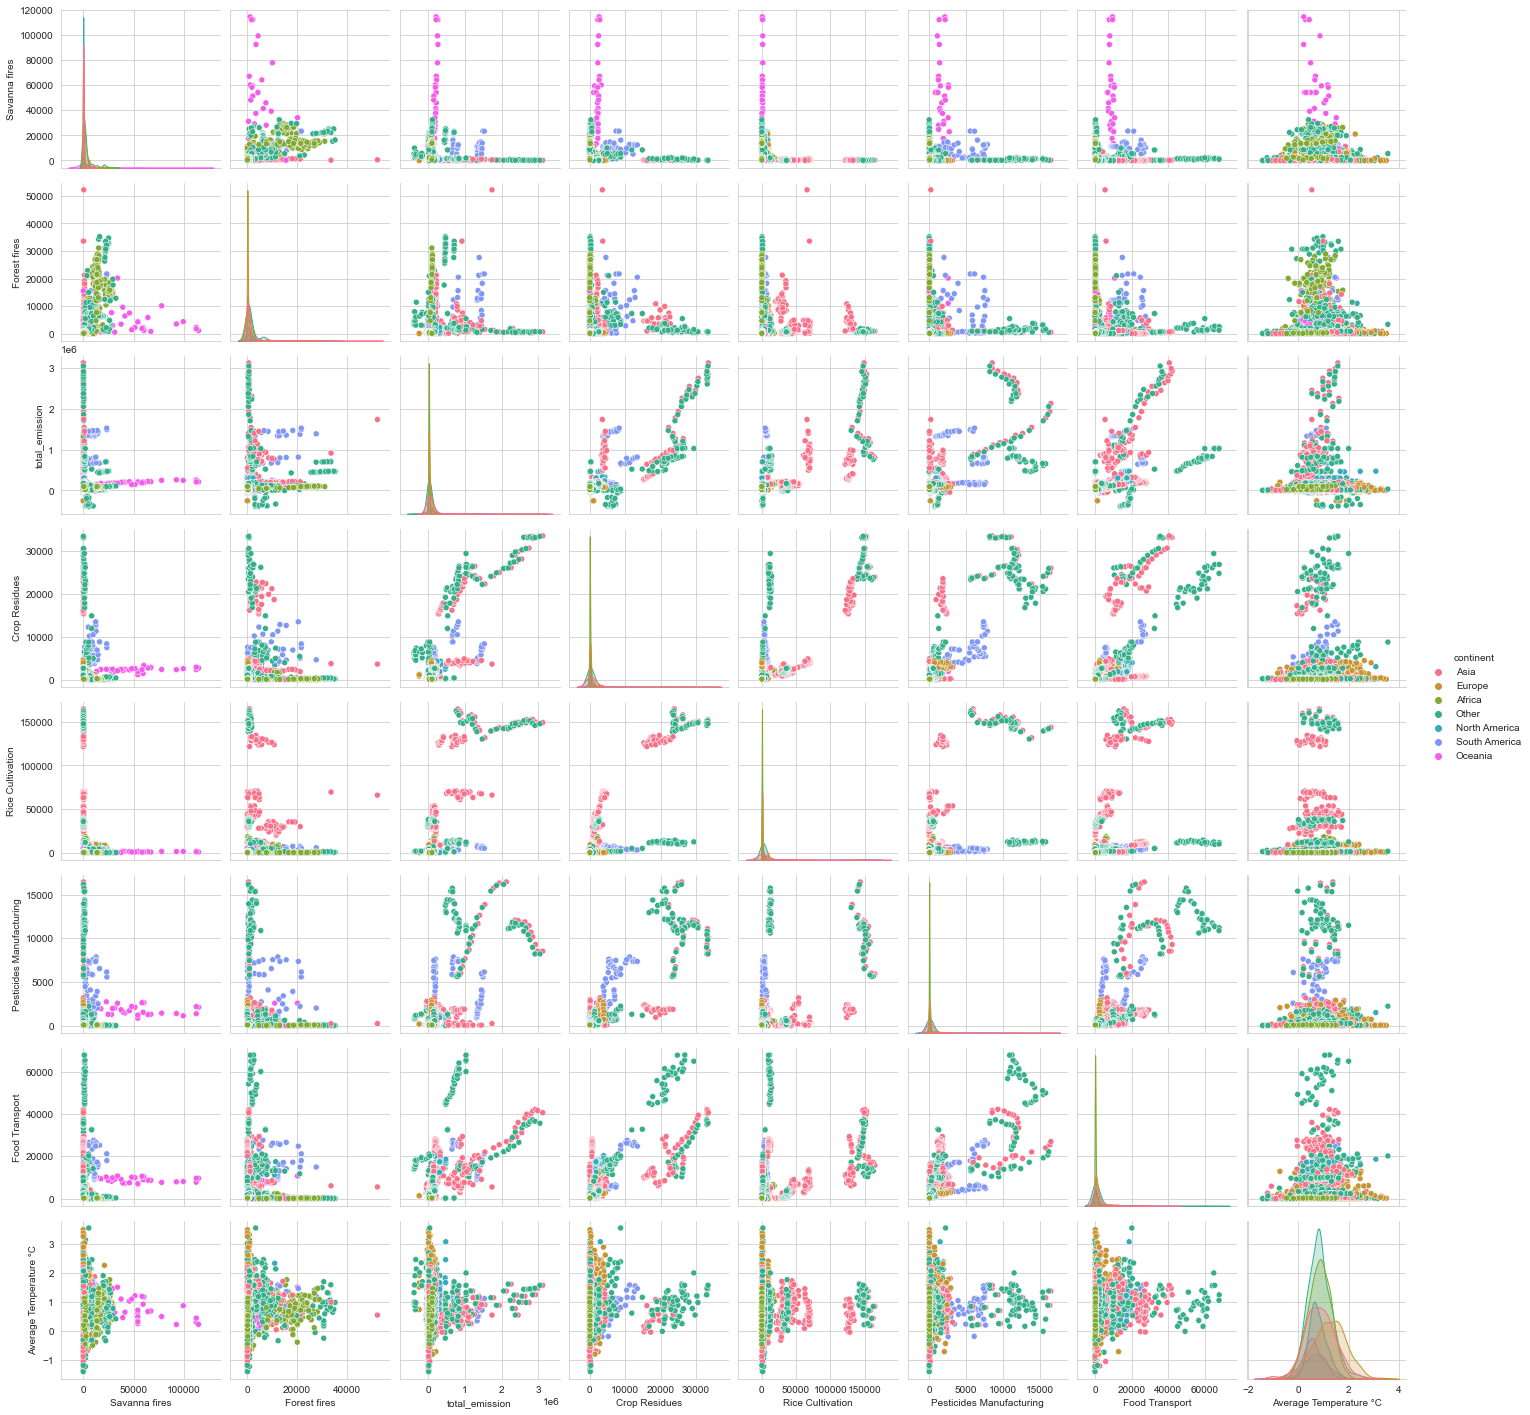

In [24]:
sns.pairplot(co2_emission, vars =[
     'Savanna fires', 'Forest fires', 
     "total_emission", 'Crop Residues',
     'Rice Cultivation','Pesticides Manufacturing',
     'Food Transport',"Average Temperature °C"
],
y_vars="Average Temperature °C",
hue = "continent")
plt.show()

## Model Development &  Evaluation

In [31]:
from sklearn.model_selection import train_test_split

features = ["Year", "Average Temperature °C", "Urban population", "pop_tot"]

# Create the feature matrix X and the target vector y
X = co2_emission[features]
y = co2_emission["total_emission"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Assuming you have X_train, X_test, y_train, y_test datasets
# Preprocess the data, e.g., scaling features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Assuming X_train_scaled, X_test_scaled, y_train, y_test are available

# Create a list of regression models
models = [
    LinearRegression(),
    DecisionTreeRegressor(random_state=42),
    RandomForestRegressor(n_estimators=100, random_state=42),
    SVR(),
    GradientBoostingRegressor(random_state=42)
]

# Loop through each model and evaluate its performance
for model in models:
    model_name = model.__class__.__name__
    mse, rmse, r_squared = evaluate_model(model, X_train_scaled, y_train)
    print(f"Model: {model_name}")
    print("Mean Squared Error:", mse)
    print("Root Mean Squared Error:", rmse)
    print("R-squared:", r_squared)
    print("-" * 40)

# Choose the best-performing model based on the evaluation metrics
# Let's assume that the RandomForestRegressor performed the best

# Train the chosen model on the entire training set
best_model = RandomForestRegressor(n_estimators=100, random_state=42)
best_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = best_model.predict(X_test_scaled)

# Evaluate its performance on the test set
test_mse = mean_squared_error(y_test, y_pred)
test_rmse = np.sqrt(test_mse)
test_r_squared = r2_score(y_test, y_pred)

print("Best Model: RandomForestRegressor")
print("Test Mean Squared Error:", test_mse)
print("Test Root Mean Squared Error:", test_rmse)
print("Test R-squared:", test_r_squared)


Model: LinearRegression
Mean Squared Error: 8190685091.959969
Root Mean Squared Error: 90502.40379105943
R-squared: 0.8288030106063143
----------------------------------------
Model: DecisionTreeRegressor
Mean Squared Error: 2658699201.5580764
Root Mean Squared Error: 51562.57559081079
R-squared: 0.9444293982859959
----------------------------------------
Model: RandomForestRegressor
Mean Squared Error: 1981043133.3891141
Root Mean Squared Error: 44508.91071896856
R-squared: 0.958593375708198
----------------------------------------
Model: SVR
Mean Squared Error: 50376809481.37756
Root Mean Squared Error: 224447.78787365573
R-squared: -0.05294710047354223
----------------------------------------
Model: GradientBoostingRegressor
Mean Squared Error: 3004027169.0861416
Root Mean Squared Error: 54809.00627712695
R-squared: 0.9372115517041175
----------------------------------------
Best Model: RandomForestRegressor
Test Mean Squared Error: 2060367226.5349898
Test Root Mean Squared Error: 4

In [35]:
# Sample new data for prediction (you can replace this with your actual data)
# Here, we assume you have two samples with three features each.
# Replace these values with your real-world data.
sample_data = np.array([[15, 20, 10, 7]])
                        

# Preprocess the sample data using the same scaler (replace "scaler" with your actual scaler)
sample_data_scaled = scaler.transform(sample_data)

# Use the trained best model to make predictions on the new data
sample_predictions = best_model.predict(sample_data_scaled)

# Print the sample predictions for total CO2 emission
print("Sample Predictions for Total CO2 Emission:")
print(sample_predictions)


Sample Predictions for Total CO2 Emission:
[18517.14845269]


In [71]:
co2_emission.to_csv('clean_co2_emissin_dataset.csv')